### Import Necessary Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import random

# Linear Regression without Normalization

In [2]:
# Load datasets
train_data = pd.read_csv('data_supervised_learning/train1', delimiter="\t", header=None)
test_data = pd.read_csv('data_supervised_learning/test1', delimiter="\t", header=None)
train_X = train_data[0].values
train_Y = train_data[1].values
test_X = test_data[0].values
test_Y = test_data[1].values

In [47]:
def linear_regression(learning_rate, features, labels, epoch, epsilon=1e-9):
    num_samples = features.shape[0]
    np.random.seed(42)
    W = np.random.normal(0, 0.1, 2)

    for i in range(epoch):
        #print("epoch is", i)

        for j in range(0, num_samples):

            # Get sample from data
            train_X_sample = features[j]
            train_Y_sample = labels[j]
            #print("\nSample is ", train_X_sample, train_Y_sample)

            # Calculate prediction for current weights
            prediction = W[0] + W[1] * train_X_sample
            #print("Prediction is", prediction)

            # Calculate difference of ground label and prediction
            difference = train_Y_sample - prediction
            #print("Difference is", difference)

            # Calculate differentials
            d_w1 = 2 * difference * (-1 * train_X_sample)
            d_w0 = 2 * difference * -1
            #print("Gradients are", w1_gra, w0_gra)

            W[0] -= learning_rate * d_w0
            W[1] -= learning_rate * d_w1
            #print("Updated weights are", W[1], W[0])

    return W

In [48]:
def plot_regression(features, labels, predictions, label_addition=""):

    plt.plot(features, predictions, label="predicted")
    plt.scatter(features, labels, s=20, color="r", label="actual")
    plt.legend(loc="upper left")
    plt.title('feature vs. label' + label_addition)
    plt.xlabel('feature')
    plt.ylabel('label')
    plt.show()

## Results on training data

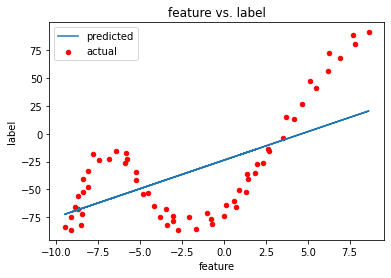

Mean Squared Error is 1232.9685190442206


In [49]:
W = linear_regression(1e-3, train_X, train_Y, 5000)
predictions = W[1] * train_X  + W[0]
plot_regression(train_X, train_Y, predictions)
error = sum(pow(train_Y - predictions, 2)) / train_Y.shape[0]
print("Mean Squared Error is", error)

In [50]:
W

array([-23.81412449,   5.11638386])

## Results on Test Data

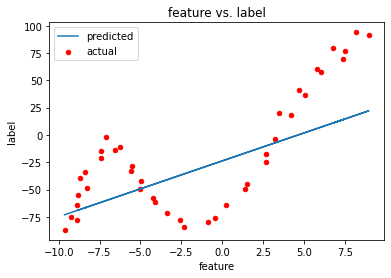

Mean Squared Error is 1487.9688814853691


In [51]:
predictions = W[1] * test_X  + W[0]
plot_regression(test_X, test_Y, predictions)
error = sum(pow(test_Y - predictions, 2)) / test_Y.shape[0]
print("Mean Squared Error is", error)

# Linear Regression with Normalization

In [52]:
# Normalize data
train_X_normalized = (train_X - np.min(train_X)) / (np.max(train_X) - np.min(train_X))
test_X_normalized = (test_X - np.min(test_X)) / (np.max(test_X) - np.min(test_X))

In [53]:
test_X_normalized

array([0.04207921, 0.04207921, 0.07425743, 0.06683168, 0.12128713,
       0.13613861, 0.16584158, 0.22029703, 0.25247525, 0.2970297 ,
       0.37871287, 0.4950495 , 0.59158416, 0.66336634, 0.70544554,
       0.78960396, 0.82920792, 0.92079208, 0.88366337, 0.95792079,
       1.        , 0.91336634, 0.84405941, 0.76980198, 0.7450495 ,
       0.69306931, 0.66336634, 0.5990099 , 0.52970297, 0.47277228,
       0.39356436, 0.33663366, 0.29207921, 0.24752475, 0.21782178,
       0.18316832, 0.11881188, 0.0519802 , 0.04455446, 0.01980198,
       0.        ])

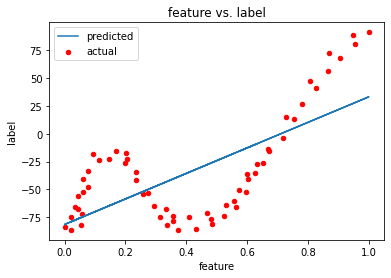

Mean Squared Error is 1189.956261684815


In [54]:
W_normalized = linear_regression(1e-3, train_X_normalized, train_Y, 5000)
predictions_normalized = W_normalized[1] * train_X_normalized  + W_normalized[0]
plot_regression(train_X_normalized, train_Y, predictions_normalized)
error = sum(pow(train_Y - predictions_normalized, 2)) / train_Y.shape[0]
print("Mean Squared Error is", error)

## Results on test data

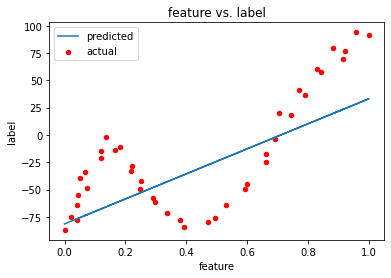

Mean Squared Error is 1399.6520495097213


In [55]:
predictions = W_normalized[1] * test_X_normalized  + W_normalized[0]
plot_regression(test_X_normalized, test_Y, predictions)
error = sum(pow(test_Y - predictions, 2)) / test_Y.shape[0]
print("Mean Squared Error is", error)

# Neural Network with 1 Hidden Layer

In [57]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_dif(x):
    return np.dot(x, 1 - x)

In [59]:
train_X.shape[1]

IndexError: tuple index out of range

In [62]:
np.random.random((3,2))

array([[0.15601864, 0.15599452],
       [0.05808361, 0.86617615],
       [0.60111501, 0.70807258]])

In [ ]:
def ann_regression(features, labels, learning_rate, epoch, num_hidden_units):

    num_features = 1
    num_samples = features.shape[0]
    num_outputs = 1

    # Define initial weights
    W = dict()
    W1 = np.random.random((num_features + 1, num_hidden_units))
    W2 = np.random.random((num_hidden_units + 1 ,num_outputs))
    W['W1'] = W1
    W['W2'] = W2

    for i in range(epoch):

        for j in features:

            # Get sample from data
            train_X_sample = features[j]
            train_Y_sample = labels[j]
            #print("\nSample is ", train_X_sample, train_Y_sample)

            # Calculate prediction for current weights
            prediction = W[0] + W[1] * train_X_sample


